# BASIC IMAGE CLASSIFICATION PROBLEM
The Fashion MNIST dataset is considered the new "HELLO WORLD" of computer vision. In this jupyter notebook, we will build a model to classify this the images of this dataset.

In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

2022-08-08 16:23:13.593490: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-08 16:23:13.593541: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# import data and divide into training and testing set
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

# data exploration: basic information about the data

first_image = train_x[0]
print(first_image.shape) # an image of 28 * 28 pixels
len(train_x) # 60k training samples
# we can determine the classes' names
print(type(train_y))
print(train_y.shape)
class_names = np.unique(train_y)
print(class_names) # the classes are labeled from 0 to  9 for easier manipulation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(28, 28)
<class 'numpy.ndarray'>
(60000,)
[0 1 2 3 4 5 6 7 8 9]


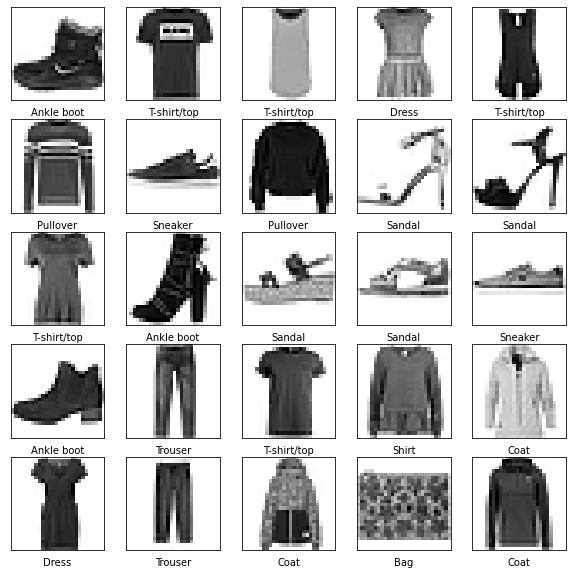

In [3]:
# since each pixel can values ranging from 0 to 255. It is a good idea to divide each image by 255: so that the final input valueswould range from 0 to 1
train_x = train_x / 255.0
test_x = test_x / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i]])
plt.show()

In [5]:
# build the model: 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input layer receiving a (28, 28) image and flatenning it to a 784 long column vector
    tf.keras.layers.Dense(128, activation='relu'), # hidden layer with 128 hidden units and relu associated acitvation function
    tf.keras.layers.Dense(10)] # output layer
    ) 

# compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_x, train_y, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4976 - accuracy: 0.8257
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3754 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3343 - accuracy: 0.8786
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3107 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2937 - accuracy: 0.8921


In [9]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3674 - accuracy: 0.8759 - 923ms/epoch - 3ms/step

Test accuracy: 0.8758999705314636


The current model object does not return probabilities. To make prediction, it might be necessary to add an additional layer:

313/313 [==============================] - 1s 2ms/step
The model predicts that image 5489 is of class Sneaker with confidence 0.99914193


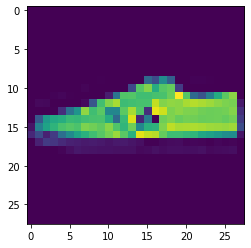

In [7]:
# this will apply the softmax function to the last layer normalizing the output
predictive_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) 
predictions  = predictive_model.predict(test_x) # make predictions

random_num = np.random.randint(0, len(test_x))
class_name = class_names[np.argmax(predictions[random_num])]
print("The model predicts that image {} is of class {} with confidence {}"
.format(str(random_num), class_name, str(predictions[random_num][np.argmax(predictions[random_num])])))
# verifying:
plt.figure()
plt.imshow(test_x[random_num])
# plt.colorbar()
plt.grid(False)
plt.show()

## Callbacks: basics
Sometimes a certain condition (accuracy, loss) is met before iterating through all the epochs. TensorFlow provides this mechanism to stop the training when such conditions are met.

In [8]:
class accuracy_call_back(tf.keras.callbacks.Callback):
    def __init__(self, threshhold=0.95):
        self.threshhold = threshhold

    def on_epoch_end(self, epoch, logs={}): # this method checks the model's status at the end of each epoch
        if (logs.get('accuracy') >= self.threshhold):
            print("\nThe model achieved an accuracy beyond {} : stopping the training".format(str(self.threshhold)))
            self.model.stop_training=True

# the whole code structure:
cbs = accuracy_call_back(0.9) # setting the accuracy to be a minimum of 0.9

mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x= train_x/255.0
test_x=test_x/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=10, callbacks=[cbs])


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4722 - accuracy: 0.8314
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3610 - accuracy: 0.8682
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3219 - accuracy: 0.8817
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2981 - accuracy: 0.8884
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2811 - accuracy: 0.8945
Epoch 6/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.2664 - accuracy: 0.9005
The model achieved an accuracy beyond 0.9 : stopping the training
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2664 - accuracy: 0.9005
